In [0]:
!pip install albumentations==0.4.5

In [0]:
import data_loader_alb
from new_resnet import Net
from utils import model_summary, plot_logs, best_lr

In [0]:
from train import train_model
from lr_finder import LRFinder

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

In [5]:
trainloader, testloader, classes = data_loader_alb.cifar10()
net = Net()

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
CUDA Available? True


In [6]:
device = model_summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [0]:
#saving the initial weights to run multiple lr finding iterations
torch.save(net.state_dict(), 'weights_only.pth')

In [0]:
from math import ceil
#claculating the number of iterations required
epochs = 10
batch_size = 512
trainset_size = 50000
iterations = ceil(trainset_size/batch_size)
num_iter = epochs*iterations


Learning rate search finished. See the graph with {finder_name}.plot()


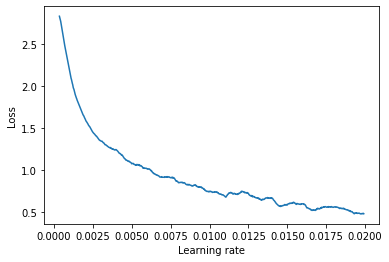

In [15]:
net.load_state_dict(torch.load('weights_only.pth'))#loading the same weights for every iteration
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-4, momentum=0.9)
lr_finder = LRFinder(net, optimizer, criterion, device=device)
lr_finder.range_test(trainloader, start_lr=1e-4, end_lr=0.02, num_iter=num_iter, step_mode="linear")
lr_finder.plot(log_lr=False) # to inspect the loss-learning rate graph
lr_finder.reset()
max_lr = best_lr(lr_finder)

In [16]:
min_lr = max_lr/10
print(max_lr)
print(min_lr)

0.019715714285714288
0.001971571428571429


In [14]:
#loading the same initial weights for which, we found the best lr
net.load_state_dict(torch.load('weights_only.pth'))

<All keys matched successfully>

In [15]:
trainer = train_model(trainloader, testloader, device)
logs, misclassified_images, lr_hist = trainer.run_model(net, epochs=24, max_lr=0.01, sch=True)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 1
LR: [0.0009999999999999992]


Loss=1.3740323781967163 Batch_id=97 Accuracy=37.75: 100%|██████████| 98/98 [00:22<00:00,  4.45it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.3939, Accuracy: 5119/10000 (51.19%)

EPOCH: 2
LR: [0.001862825146503981]


Loss=1.0918467044830322 Batch_id=97 Accuracy=57.14: 100%|██████████| 98/98 [00:22<00:00,  4.43it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.0412, Accuracy: 6275/10000 (62.75%)

EPOCH: 3
LR: [0.004120426260042766]


Loss=0.8826957941055298 Batch_id=97 Accuracy=65.67: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9729, Accuracy: 6647/10000 (66.47%)

EPOCH: 4
LR: [0.006907063335488947]


Loss=0.8405880928039551 Batch_id=97 Accuracy=71.22: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.9383, Accuracy: 6986/10000 (69.86%)

EPOCH: 5
LR: [0.009154122798231294]


Loss=0.7143046259880066 Batch_id=97 Accuracy=74.57: 100%|██████████| 98/98 [00:22<00:00,  4.40it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6736, Accuracy: 7781/10000 (77.81%)

EPOCH: 6
LR: [0.009999993594945831]


Loss=0.5544305443763733 Batch_id=97 Accuracy=78.24: 100%|██████████| 98/98 [00:22<00:00,  4.38it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6337, Accuracy: 7873/10000 (78.73%)

EPOCH: 7
LR: [0.009937369869797048]


Loss=0.4421062469482422 Batch_id=97 Accuracy=80.80: 100%|██████████| 98/98 [00:22<00:00,  4.32it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6117, Accuracy: 7987/10000 (79.87%)

EPOCH: 8
LR: [0.009753706261960138]


Loss=0.4279489517211914 Batch_id=97 Accuracy=82.57: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5935, Accuracy: 8054/10000 (80.54%)

EPOCH: 9
LR: [0.009454012635881602]


Loss=0.44568124413490295 Batch_id=97 Accuracy=84.18: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5165, Accuracy: 8305/10000 (83.05%)

EPOCH: 10
LR: [0.009046463852437882]


Loss=0.41635704040527344 Batch_id=97 Accuracy=85.02: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4943, Accuracy: 8343/10000 (83.43%)

EPOCH: 11
LR: [0.008542176780040937]


Loss=0.3595554232597351 Batch_id=97 Accuracy=86.64: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4705, Accuracy: 8476/10000 (84.76%)

EPOCH: 12
LR: [0.00795490705544747]


Loss=0.3183010220527649 Batch_id=97 Accuracy=87.82: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4044, Accuracy: 8641/10000 (86.41%)

EPOCH: 13
LR: [0.007300673865846474]


Loss=0.3250465989112854 Batch_id=97 Accuracy=89.07: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4459, Accuracy: 8573/10000 (85.73%)

EPOCH: 14
LR: [0.006597322987191624]


Loss=0.3286028206348419 Batch_id=97 Accuracy=90.18: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3961, Accuracy: 8729/10000 (87.29%)

EPOCH: 15
LR: [0.005864039997953725]


Loss=0.3647056221961975 Batch_id=97 Accuracy=90.64: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4025, Accuracy: 8641/10000 (86.41%)

EPOCH: 16
LR: [0.0051208269465530965]


Loss=0.2581229507923126 Batch_id=97 Accuracy=91.38: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4709, Accuracy: 8553/10000 (85.53%)

EPOCH: 17
LR: [0.00438795674762012]


Loss=0.1672387421131134 Batch_id=97 Accuracy=92.02: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3607, Accuracy: 8846/10000 (88.46%)

EPOCH: 18
LR: [0.0036854201897316597]


Loss=0.21145375072956085 Batch_id=97 Accuracy=92.90: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3452, Accuracy: 8871/10000 (88.71%)

EPOCH: 19
LR: [0.00303238063881079]


Loss=0.17497682571411133 Batch_id=97 Accuracy=93.45: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3579, Accuracy: 8860/10000 (88.60%)

EPOCH: 20
LR: [0.002446651311459579]


Loss=0.1486731767654419 Batch_id=97 Accuracy=94.01: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3643, Accuracy: 8888/10000 (88.88%)

EPOCH: 21
LR: [0.0019442093768457615]


Loss=0.17371328175067902 Batch_id=97 Accuracy=94.51: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3500, Accuracy: 8894/10000 (88.94%)

EPOCH: 22
LR: [0.0015387601411772367]


Loss=0.12637236714363098 Batch_id=97 Accuracy=95.22: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3366, Accuracy: 8958/10000 (89.58%)

EPOCH: 23
LR: [0.001241363202675764]


Loss=0.15002043545246124 Batch_id=97 Accuracy=95.50: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3308, Accuracy: 8968/10000 (89.68%)

EPOCH: 24
LR: [0.0010601307745677067]


Loss=0.0912422314286232 Batch_id=97 Accuracy=95.71: 100%|██████████| 98/98 [00:23<00:00,  4.24it/s]



Test set: Average loss: 0.3232, Accuracy: 9007/10000 (90.07%)



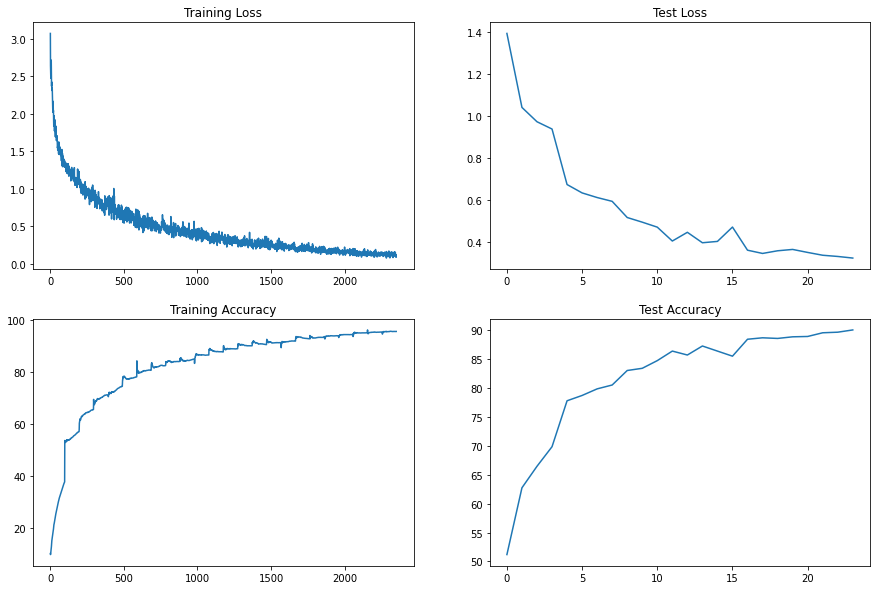

In [16]:
plot_logs(logs)